In [10]:
import numpy as np
from spec_id import Likelihood_contours
import matplotlib.pyplot as plt
from matplotlib import gridspec
from vtl.Readfile import Readfile
from vtl.Photo import Photometry
import pandas as pd
from glob import glob
from astropy.io import fits, ascii
from astropy.table import Table
from scipy.interpolate import interp1d
import os
import cPickle
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [3]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')
metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
M,A=np.meshgrid(metal,age)

In [19]:
"""DATA"""

lzDB = galDB.query('hi_res_specz < 1.16')
mzDB = galDB.query('1.16 < hi_res_specz < 1.3')
mzDB = mzDB.query('ids != 14713 and ids != 38126')
hzDB = galDB.query('1.3 < hi_res_specz < 1.45')
uhzDB = galDB.query('1.45 < hi_res_specz')


Pl,Pm,Ph,Puh = np.ones([4,len(metal)])

for i in lzDB.index:
    Z,PZ = np.load('../chidat/%s_79-114_Z_pos_ff.npy' % lzDB['gids'][i])
    Pl = Pl * PZ
    
for i in mzDB.index:
    Z,PZ = np.load('../chidat/%s_79-114_Z_pos_ff.npy' % mzDB['gids'][i])
    Pm = Pm * PZ
    
for i in hzDB.index:
    Z,PZ = np.load('../chidat/%s_79-114_Z_pos_ff.npy' % hzDB['gids'][i])
    Ph = Ph * PZ
    
for i in uhzDB.index:
    Z,PZ = np.load('../chidat/%s_79-114_Z_pos_ff.npy' % uhzDB['gids'][i])
    Puh = Puh * PZ
    
Pl /= np.trapz(Pl,metal)
Pm /= np.trapz(Pm,metal)
Ph /= np.trapz(Ph,metal)
Puh /= np.trapz(Puh,metal)

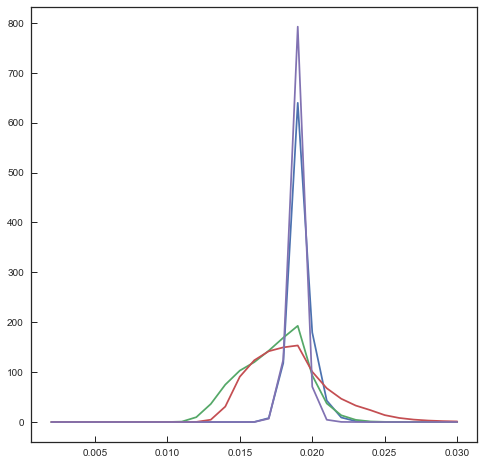

In [20]:
%matplotlib inline

prior = (Pl*Pm*Ph) / np.trapz((Pl*Pm*Ph),metal)

plt.figure(figsize=[8,8])
plt.plot(metal,Pl)
plt.plot(metal,Pm)
plt.plot(metal,Ph)
plt.plot(metal,prior)
plt.show()
plt.close()

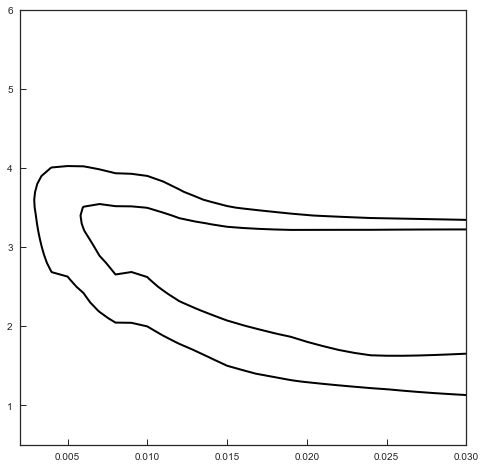

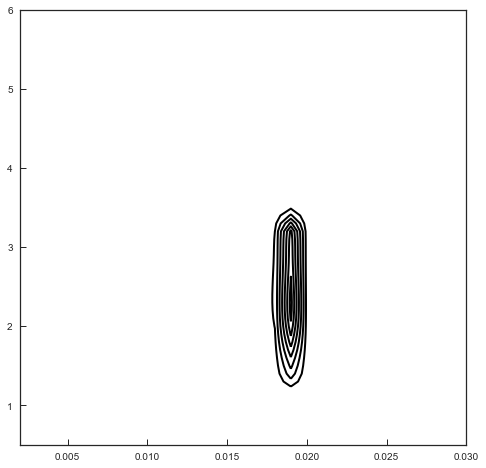

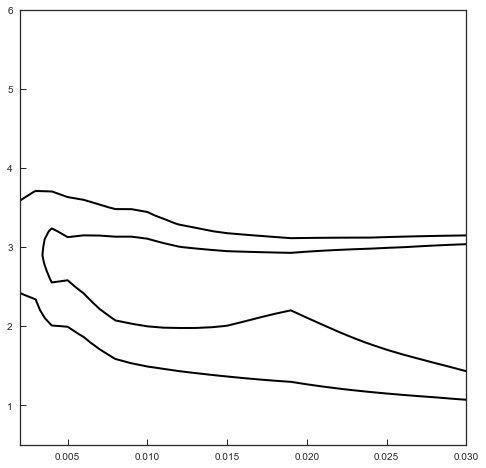

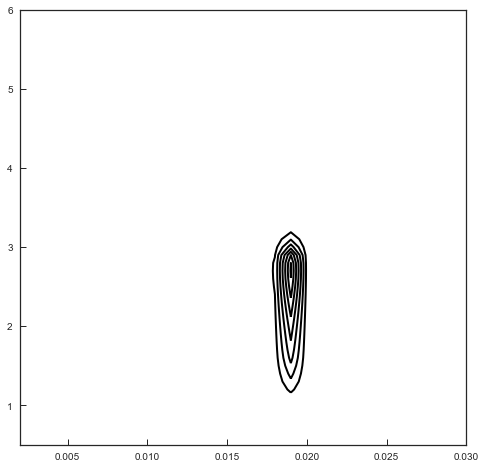

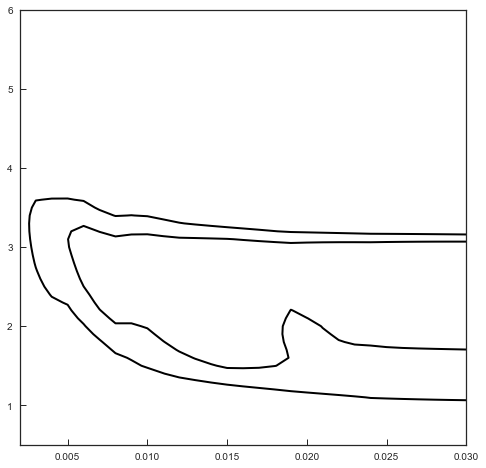

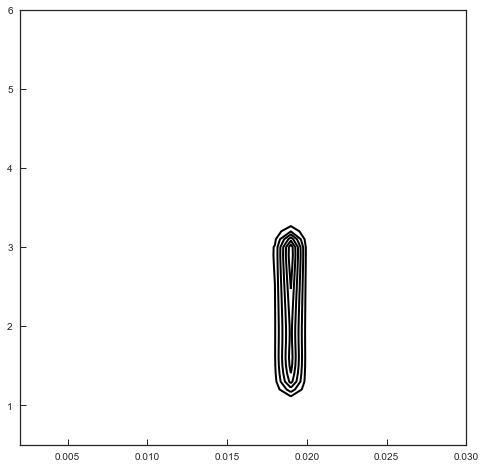

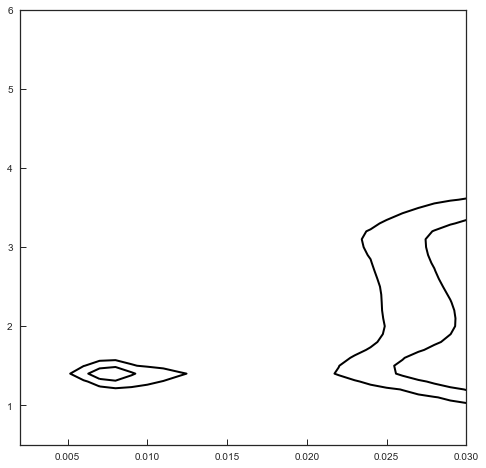

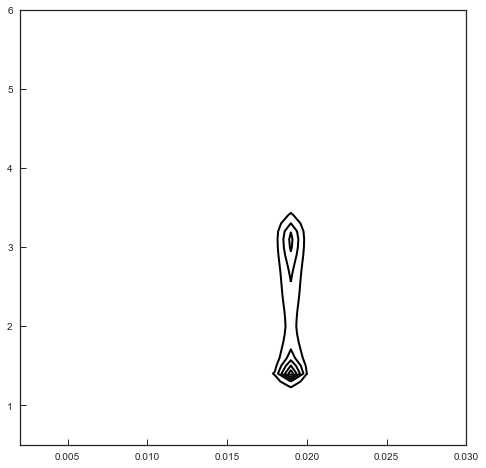

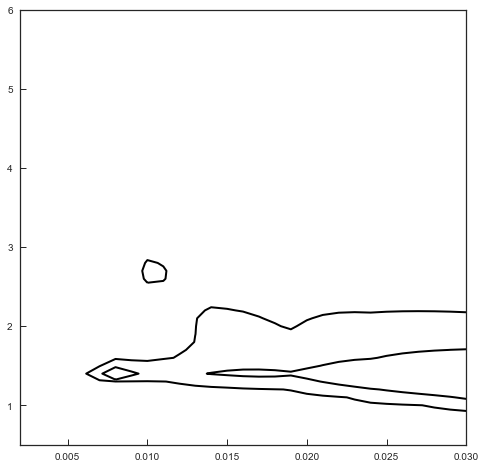

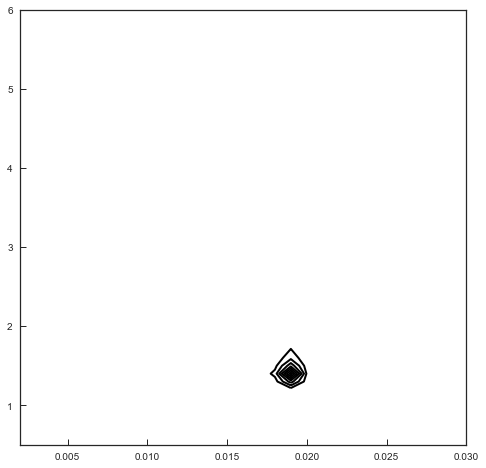

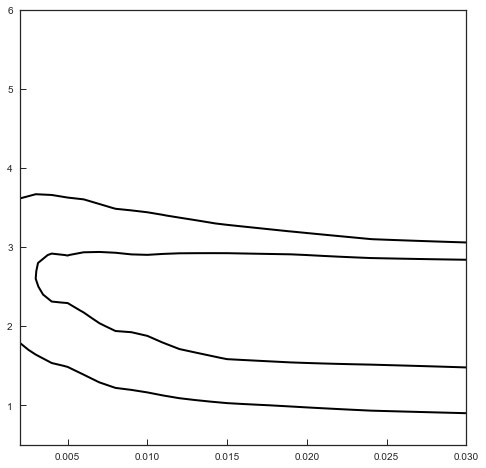

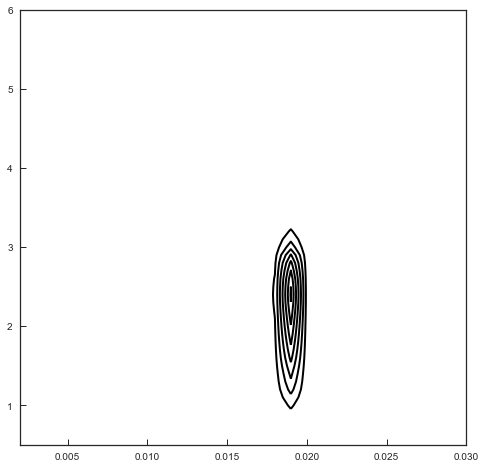

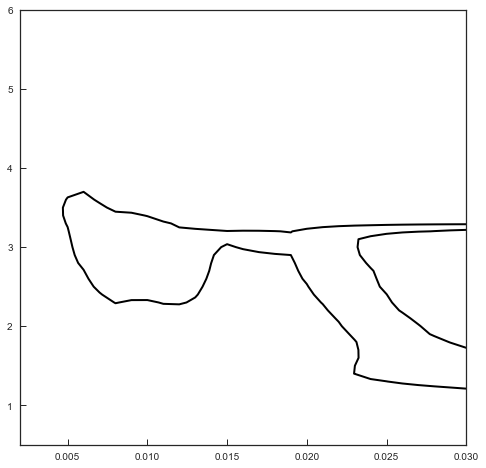

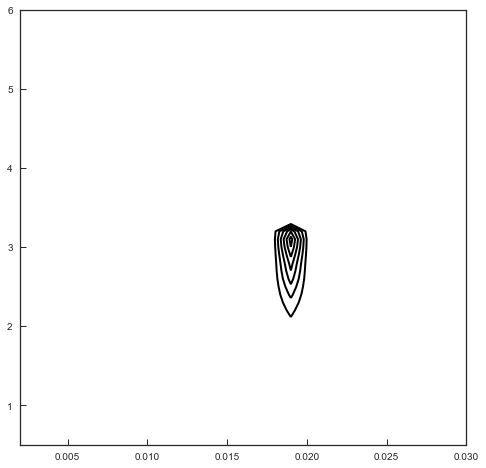

In [21]:
for i in uhzDB.index:
    P = np.load('../chidat/%s_79-114_tZ_pos_ff.npy' % uhzDB['gids'][i])
    osig,tsig = Likelihood_contours(age,metal,P)
    levels = np.array([tsig,osig])
    
    plt.figure(figsize=[8,8])
    plt.contour(M,A,P,levels,colors='k',linewidths=2)    
    plt.show()
    plt.close()
    
    plt.figure(figsize=[8,8])
    plt.contour(M,A,P*prior,colors='k',linewidths=2)    
    plt.show()
    plt.close()

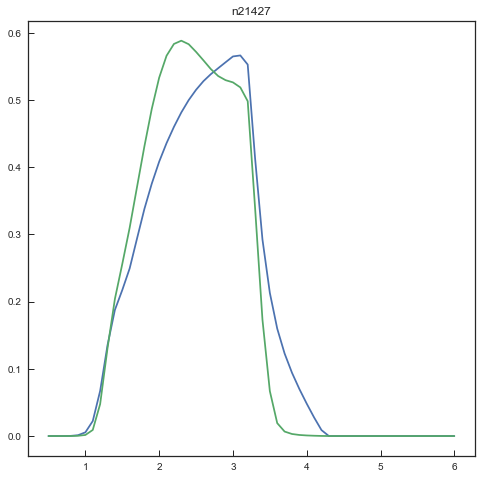

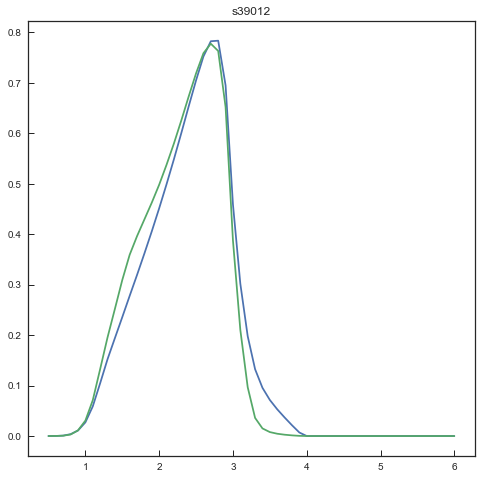

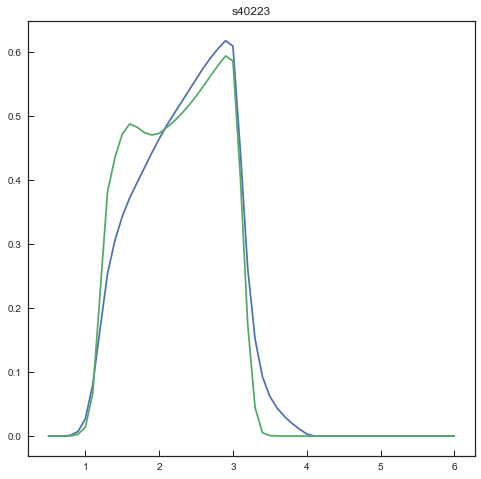

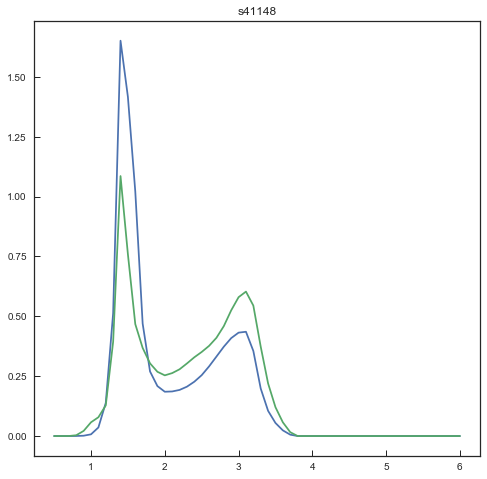

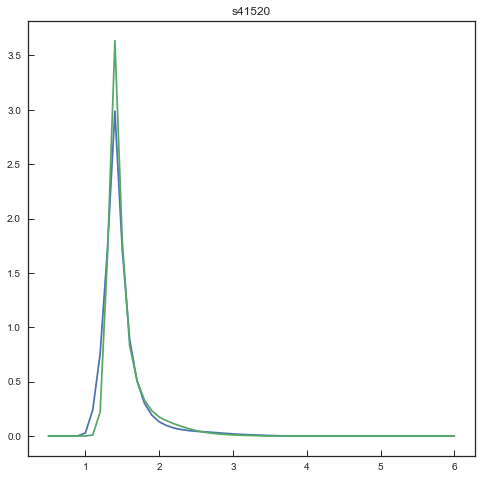

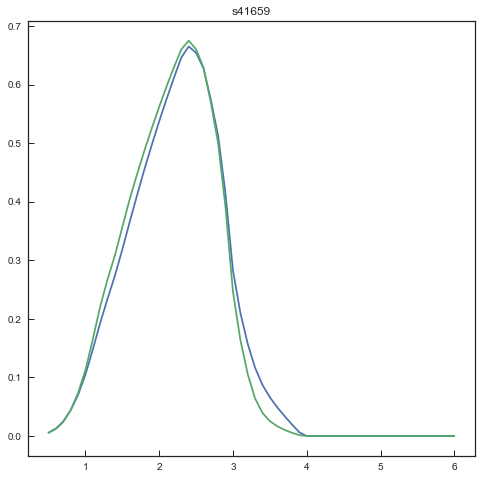

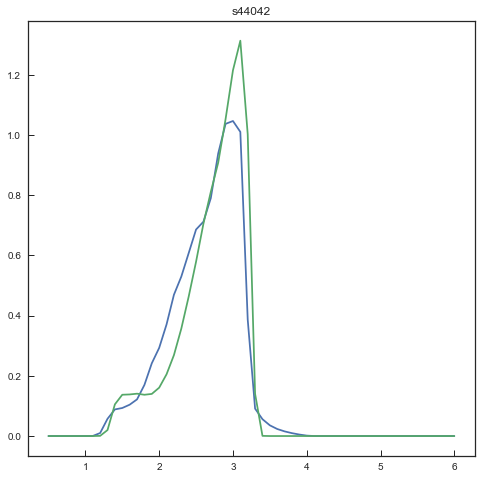

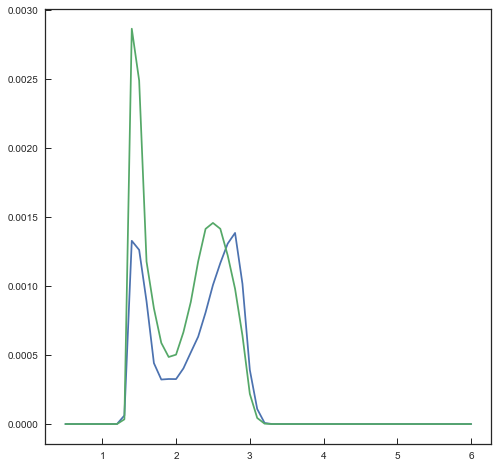

In [24]:
tPt = np.ones(len(age))
newtPt = np.ones(len(age))


for i in uhzDB.index:
    P = np.load('../chidat/%s_79-114_tZ_pos_ff.npy' % uhzDB['gids'][i])
    Z,PZ = np.load('../chidat/%s_79-114_Z_pos_ff.npy' % uhzDB['gids'][i])
    t,Pt = np.load('../chidat/%s_79-114_t_pos_ff.npy' % uhzDB['gids'][i])
    newP = P*prior
    C = np.trapz(np.trapz(newP,metal,axis=1),age)
    newP /= C
    
    newPZ = np.trapz(newP.T,age,axis=1)
    newPt = np.trapz(newP,metal,axis=1)
    
    tPt = tPt * Pt
    newtPt = newtPt * newPt
    
    
    # plt.figure(figsize=[8,8])
    # plt.plot(metal,PZ)
    # plt.plot(metal,newPZ)
    # plt.show()
    # plt.close()
    
    plt.figure(figsize=[8,8])
    plt.plot(age,Pt)
    plt.plot(age,newPt)
    plt.title(uhzDB['gids'][i])
    plt.show()
    plt.close()
    
plt.figure(figsize=[8,8])
plt.plot(age,tPt)
plt.plot(age,newtPt)
plt.show()
plt.close()